In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

from pathlib import Path 
data_path = Path('data')

%matplotlib  inline

In [2]:
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Grafico de Tartas

In [4]:
cities = data.query('city in ("Seattle","Renton","Bellevue","Redmond","Issaquah")')
vc = cities['city'].value_counts(normalize=True)
vc

Seattle     0.611111
Renton      0.113831
Bellevue    0.111111
Redmond     0.091298
Issaquah    0.072650
Name: city, dtype: float64

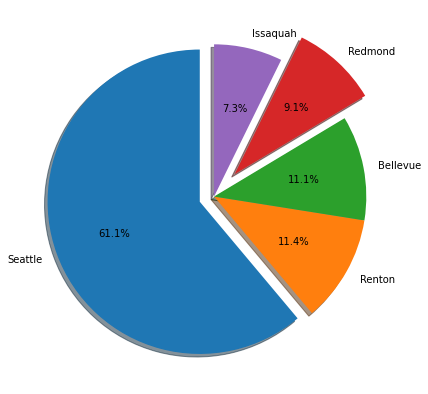

In [11]:
fig, ax = plt.subplots(figsize = (15,7))

explode =[0.1,0,0,0.2,0] 

#Para crear el grafico de tartas.
ax.pie(vc, labels=vc.index, explode=explode,shadow=True,autopct='%1.1f%%', startangle=90);
#Labels pone etiquetas, autopct los porcentajes, explode separa los valores, shadow pone sombra, startangle es el angulo inicial.

Grafico de tablas.

In [12]:
df = data.query('condition in (2,3,4) and bedrooms in (1,2,3)')
_ = df.pivot_table(index = 'condition', columns = 'bedrooms', values = 'price', aggfunc=np.count_nonzero)
_

bedrooms,1.0,2.0,3.0
condition,,,
2,4,11,9
3,23,340,1248
4,6,155,587


In [13]:
price_mean = df.groupby('bedrooms')['price'].mean()
price_mean

bedrooms
1.0    270825.000000
2.0    384626.305381
3.0    481533.162858
Name: price, dtype: float64

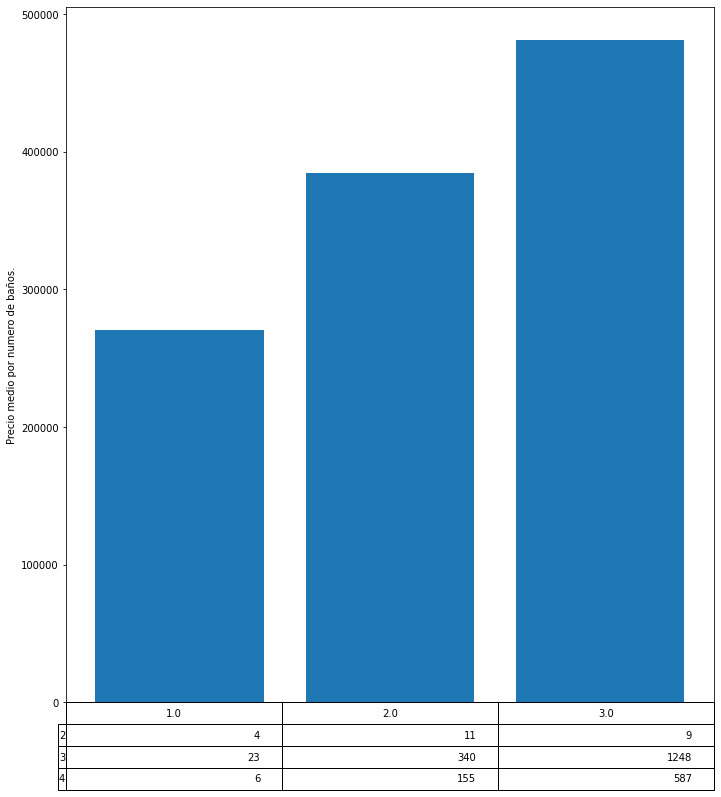

In [19]:
fig, ax = plt.subplots(figsize = (10,7))
#Crea el grafico.
ax.bar(x = price_mean.index, height=price_mean.values)
#Le añade la tabla abajo.
ax.table(_.values, loc= 'bottom', rowLabels=_.index.values, colLabels=_.columns.values)
#Adjusta la distancia entre la tabla y el grafico.
plt.subplots_adjust(left = 0, bottom=-0.5)
#Quita los valores del eje X.
plt.xticks([])
#Añade una etiqueta al eje Y.
plt.ylabel('Precio medio por numero de baños.');

Mapa de calor.

In [20]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (18).

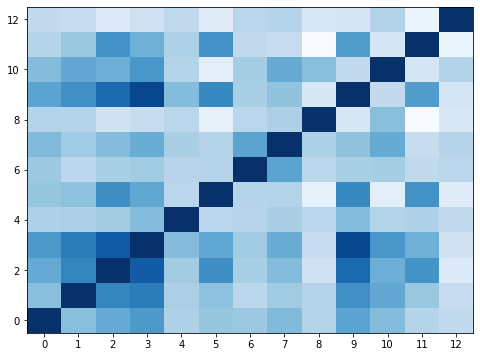

In [25]:
fig, ax = plt.subplots(figsize= (8,6))
#Creamos el mapa de calor, le introducimos iel eje x e y respectivamente, y le añadimos como datos el dataframe. Cmap cambia el color.
ax.pcolormesh(np.arange(13),np.arange(13),data.corr().values, cmap='Blues');

plt.xticks(np.arange(13), data.columns, rotation= 'vertical');
plt.yticks(np.arange(13), data.columns, rotation= 'horizontal');

Graficos 3D

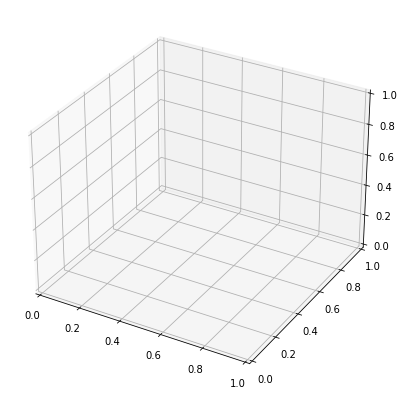

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

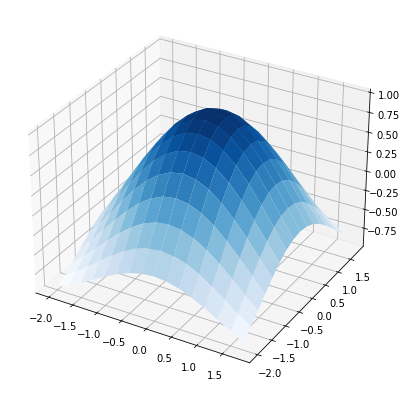

In [28]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R)

surf = ax.plot_surface(X, Y, Z, cmap='Blues')